## Saâd AZIZ ALAOUI & Simoné IANNELLI

In [3]:
import numpy as np
from numpy.random import normal
from scipy.stats import weibull_min, logistic, norm, gamma, expon, truncweibull_min
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Vecteur des failure times (les individus censurés ont un nan)
t =np.array([12,17,21, 25, 11,  26,  27,  30, 13, 12,  21,20,  23,  25,  23,  29, 35, np.nan, 31, 36,
     32, 27,  23, 12, 18, np.nan, np.nan,  38, 29, 30, np.nan, 32, np.nan, np.nan, np.nan, np.nan, 25,  30, 37, 27,
     22, 26, np.nan, 28, 19,  15,  12,  35, 35, 10,  22, 18, np.nan,  12, np.nan, np.nan, 31,  24, 37, 29,
     27, 18,  22, 13, 18,  29,  28, np.nan, 16, 22,  26, 19, np.nan, np.nan,  17,  28, 26,  12, 17, 26])
# les individus censurés ont une valeur différente de zéro (leur temps de censure en semaines)
tcensor =np.array([0, 0,  0, 0, 0,  0,  0,  0, 0, 0,  0, 0,  0,  0,  0,  0, 0, 40, 0, 0,
     0, 0,  0, 0, 0, 40, 40,  0, 0, 0, 40, 0, 40, 40, 40, 40, 0,  0, 0, 0,
     0, 0, 10, 0, 0,  0,  0,  0, 0, 0,  0, 0, 24,  0, 40, 40, 0,  0, 0, 0,
     0, 0,  0, 0, 0,  0,  0, 20, 0, 0,  0, 0, 29, 10,  0,  0, 0,  0, 0, 0])

is_censored = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 
0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 
0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

t_uncensored =np.array([12, 17, 21, 25, 11, 26, 27, 30, 13, 12, 21, 20, 23, 25, 23, 
29, 35, 31, 36, 32, 27, 23, 12, 18, 38, 29, 30, 32, 25, 30, 37, 
27, 22, 26, 28, 19, 15, 12, 35, 35, 10, 22, 18, 12, 31, 24, 37, 
29, 27, 18, 22, 13, 18, 29, 28, 16, 22, 26, 19, 17, 28, 26, 12, 
17, 26])

group_mice = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 
3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 
4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

len_uncens = len(t_uncensored)
len_cens = 80 - len_uncens
len_group = 4

In [37]:
init_r = 1 
init_beta1 = 1
init_beta2 = 1
init_beta3 = 1
init_beta4 = 1
init_vehcontrol = 0
init_testsub = 0
init_poscontrol = 0

In [38]:
# normalized_uncensored_1 = [k / prop for k in uncensored_array_1]
#         normalized_uncensored_2 = [k / prop for k in uncensored_array_2]
#         normalized_uncensored_3 = [k / prop for k in uncensored_array_3]
#         normalized_uncensored_4 = [k / prop for k in uncensored_array_4]
#         top_1 = (-10**-3)*prop + sum( (np.exp(beta1)-1) * np.log(normalized_uncensored_1)) - sum( (np.exp(beta1)) * (normalized_uncensored_1)) + sum( (np.exp(beta1)-1) * np.log(censored_array_1/prop))
#         top_2 = (-10**-3)*prop + sum( (np.exp(beta2)-1) * np.log(normalized_uncensored_2)) - sum( (np.exp(beta2)) * (normalized_uncensored_2)) + sum( (np.exp(beta2)-1) * np.log(censored_array_2/prop))
#         top_3 = (-10**-3)*prop + sum( (np.exp(beta3)-1) * np.log(normalized_uncensored_3)) - sum( (np.exp(beta3)) * (normalized_uncensored_3)) + sum( (np.exp(beta3)-1) * np.log(censored_array_3/prop))
#         top_4 = (-10**-3)*prop + sum( (np.exp(beta4)-1) * np.log(normalized_uncensored_4)) - sum( (np.exp(beta4)) * (normalized_uncensored_4)) + sum( (np.exp(beta4)-1) * np.log(censored_array_4/prop))

In [39]:
t_1 = t[:20]
tcen_1 = tcensor[:20]
is_censored_1 = is_censored[:20]
uncensored_array_1 = [t_1[i] for i in range(len(t_1)) if is_censored_1[i] == 0]
censored_array_1 = [tcen_1[i] for i in range(len(tcen_1)) if is_censored_1[i] == 1]


In [40]:
def mice(nchain,init_r,init_beta1,init_beta2,init_beta3,init_beta4,init_vehcontrol,init_testsub,init_poscontrol,prop_sd,t,tcen) :

    ## nchain est la taille de la chaine 
    ## init_alpha, init_beta1, init_beta2,init_beta3,init_beta4,init_vehcontrol,init_testsub,init_poscontrol sont les val init de nos param
    ## prop_sd est la variance pour la MC
    ## la fonction résoud le probleme WINBUGS MICE MCMC within GIBBS.

    r = init_r
    beta1 = init_beta1
    beta2 = init_beta2
    beta3 = init_beta3
    beta4 = init_beta4
    veh_control = init_vehcontrol
    testsub = init_testsub
    poscontrol = init_poscontrol	


    chain = np.zeros((nchain+1, 8))
    acc_rate = np.zeros(5)
    chain[0,0] = init_r
    chain[0,1] = init_beta1
    chain[0,2] = init_beta2
    chain[0,3] = init_beta3
    chain[0,4] = init_beta4
    chain[0,5] = init_vehcontrol
    chain[0,6] = init_testsub
    chain[0,7] = init_poscontrol

    t_1 = t[:20]
    tcen_1 = tcen[:20]
    is_censored_1 = is_censored[:20]
    uncensored_array_1 = [t_1[i] for i in range(len(t_1)) if is_censored_1[i] == 0]
    censored_array_1 = [tcen_1[i] for i in range(len(tcen_1)) if is_censored_1[i] == 1]

    t_2 = t[20:40]
    tcen_2 = tcen[20:40]
    is_censored_2 = is_censored[20:40]
    uncensored_array_2 = [t_2[i] for i in range(len(t_2)) if is_censored_2[i] == 0]
    censored_array_2 = [tcen_2[i] for i in range(len(tcen_2)) if is_censored_2[i] == 1]

    t_3= t[40:60]
    tcen_3 = tcen[40:60]
    is_censored_3 = is_censored[40:60]
    uncensored_array_3 = [t_3[i] for i in range(len(t_3)) if is_censored_3[i] == 0]
    censored_array_3 = [tcen_3[i] for i in range(len(tcen_3)) if is_censored_3[i] == 1]

    t_4 = t[60:80]
    tcen_4 = tcen[60:80]
    is_censored_4 = is_censored[60:80]
    uncensored_array_4 = [t_4[i] for i in range(len(t_4)) if is_censored_4[i] == 0]
    censored_array_4 = [tcen_4[i] for i in range(len(tcen_4)) if is_censored_4[i] == 1]
    
    for i in range(nchain) : 

        # Mise à jour de r pour commencer 

        prop = normal(loc = r, scale = prop_sd[0])
        
        top_1 = (-10**-4)*prop + sum( (prop-1) * np.log(np.array(uncensored_array_1)/np.exp(beta1))) - sum((np.array(uncensored_array_1)/np.exp(beta1))**(prop)) - sum((np.array(censored_array_1)/np.exp(beta1))**prop)
        top_2 = sum( ((prop)-1) * np.log(np.array(uncensored_array_2)/np.exp(beta2))) - sum((np.array(uncensored_array_2)/np.exp(beta2))**(prop)) - sum((np.array(censored_array_2)/np.exp(beta2))**prop)
        top_3 = sum( ((prop)-1) * np.log(np.array(uncensored_array_3)/np.exp(beta3))) - sum((np.array(uncensored_array_3)/np.exp(beta3))**(prop)) - sum((np.array(censored_array_3)/np.exp(beta3))**prop)
        top_4 = sum( ((prop)-1) * np.log(np.array(uncensored_array_4)/np.exp(beta4))) - sum((np.array(uncensored_array_4)/np.exp(beta4))**(prop)) - sum((np.array(censored_array_4)/np.exp(beta4))**prop)

        top = top_1 + top_2 + top_3 + top_4

        bottom_1 = (-10**-4)*r + sum( (r-1) * np.log(np.array(uncensored_array_1)/np.exp(beta1))) - sum((np.array(uncensored_array_1)/np.exp(beta1))**(r)) - sum((np.array(censored_array_1)/np.exp(beta1))**r)
        bottom_2 = sum( ((r)-1) * np.log(np.array(uncensored_array_2)/np.exp(beta2))) - sum((np.array(uncensored_array_2)/np.exp(beta2))**(r)) - sum((np.array(censored_array_2)/np.exp(beta2))**r)
        bottom_3 = sum( ((r)-1) * np.log(np.array(uncensored_array_3)/np.exp(beta3))) - sum((np.array(uncensored_array_3)/np.exp(beta3))**(r)) - sum((np.array(censored_array_3)/np.exp(beta3))**r)
        bottom_4 = sum( ((r)-1) * np.log(np.array(uncensored_array_4)/np.exp(beta4))) - sum((np.array(uncensored_array_4)/np.exp(beta4))**(r)) - sum((np.array(censored_array_4)/np.exp(beta4))**r)

        bottom = bottom_1 + bottom_2 + bottom_3 + bottom_4

        acc_prob = np.exp(top - bottom)

        if np.random.uniform() < acc_prob:
            r = prop
            acc_rate[0] += 1

        # Mise à jour de Beta 1 
        prop = normal(loc = beta1, scale = prop_sd[1])

        top = - (prop**2 / (2 * 1e3)) + sum( (r-1) * np.log(np.array(uncensored_array_1)/np.exp(prop))) - sum((np.array(uncensored_array_1)/np.exp(prop))**(r)) - sum((np.array(censored_array_1)/np.exp(prop))**r)
        bottom = - (beta1**2 / (2 * 1e3)) + sum( (r-1) * np.log(np.array(uncensored_array_1)/np.exp(beta1))) - sum((np.array(uncensored_array_1)/np.exp(beta1))**(r)) - sum((np.array(censored_array_1)/np.exp(beta1))**r)
        acc_prob = np.exp(top - bottom)

        if np.random.uniform() < acc_prob:
            beta1 = prop
            acc_rate[1] += 1

        median1 = (np.log(2) * np.exp(-beta1)) ** 1/r

        # Mise à jour de Beta 2
        prop = normal(loc = beta2, scale = prop_sd[2])

        top = - (prop**2 / (2 * 1e3)) + sum( (r-1) * np.log(np.array(uncensored_array_2)/np.exp(prop))) - sum((np.array(uncensored_array_2)/np.exp(prop))**(r)) - sum((np.array(censored_array_2)/np.exp(prop))**r)
        bottom = - (beta2**2 / (2 * 1e3)) + sum( (r-1) * np.log(np.array(uncensored_array_2)/np.exp(beta2))) - sum((np.array(uncensored_array_2)/np.exp(beta2))**(r)) - sum((np.array(censored_array_2)/np.exp(beta2))**r)
        acc_prob = np.exp(top - bottom)

        if np.random.uniform() < acc_prob:
            beta2 = prop
            acc_rate[2] += 1

        median2 = (np.log(2) * np.exp(-beta2)) ** 1/r

        # Mise à jour de Beta 3
        prop = normal(loc = beta3, scale = prop_sd[3])

        top = - (prop**2 / (2 * 1e3)) + sum( (r-1) * np.log(np.array(uncensored_array_3)/np.exp(prop))) - sum((np.array(uncensored_array_3)/np.exp(prop))**(r)) - sum((np.array(censored_array_3)/np.exp(prop))**r)
        bottom = - (beta3**2 / (2 * 1e3)) + sum( (r-1) * np.log(np.array(uncensored_array_3)/np.exp(beta3))) - sum((np.array(uncensored_array_3)/np.exp(beta3))**(r)) - sum((np.array(censored_array_3)/np.exp(beta3))**r)
        acc_prob = np.exp(top - bottom)

        if np.random.uniform() < acc_prob:
            beta3 = prop
            acc_rate[2] += 1

        median3 = (np.log(2) * np.exp(-beta3)) ** 1/r

        # Mise à jour de Beta 4
        prop = normal(loc = beta4, scale = prop_sd[4])

        top = - (prop**2 / (2 * 1e3)) + sum( (r-1) * np.log(np.array(uncensored_array_4)/np.exp(prop))) - sum((np.array(uncensored_array_4)/np.exp(prop))**(r)) - sum((np.array(censored_array_4)/np.exp(prop))**r)
        bottom = - (beta4**2 / (2 * 1e3)) + sum( (r-1) * np.log(np.array(uncensored_array_4)/np.exp(beta4))) - sum((np.array(uncensored_array_4)/np.exp(beta4))**(r)) - sum((np.array(censored_array_4)/np.exp(beta4))**r)
        acc_prob = np.exp(top - bottom)

        if np.random.uniform() < acc_prob:
            beta4 = prop
            acc_rate[3] += 1

        median4 = (np.log(2) * np.exp(-beta4)) ** 1/r

        vehcontrol = beta2 - beta1
        testsub = beta3 -  beta1
        poscontrol = beta4 - beta1
        chain[i+1,:] = np.array([r, beta1, beta2, beta3, median4, vehcontrol, testsub, poscontrol ])


    return(chain,acc_rate)



In [41]:
chain, acc_rate = mice(11000, init_r, init_beta1, init_beta2, init_beta3,init_beta4,init_vehcontrol,init_testsub,
                       init_poscontrol, np.array([0.01,0.01, 0.01, 0.011, 0.01]),t,tcensor)

Text(0.5, 1.0, 'variations de r')

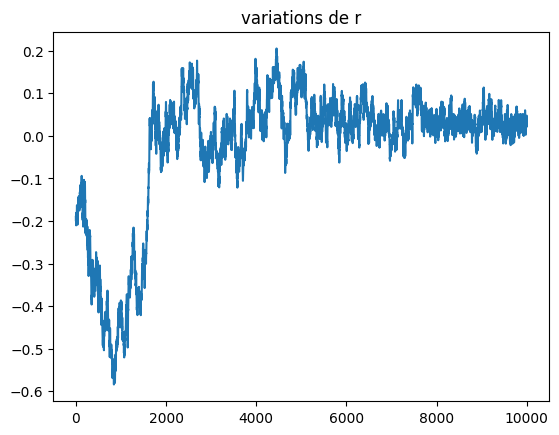

In [42]:
plt.plot(chain[:,0][1000:]) # on retire les 1000 premières itérations (burn-in)
plt.title("variations de r")

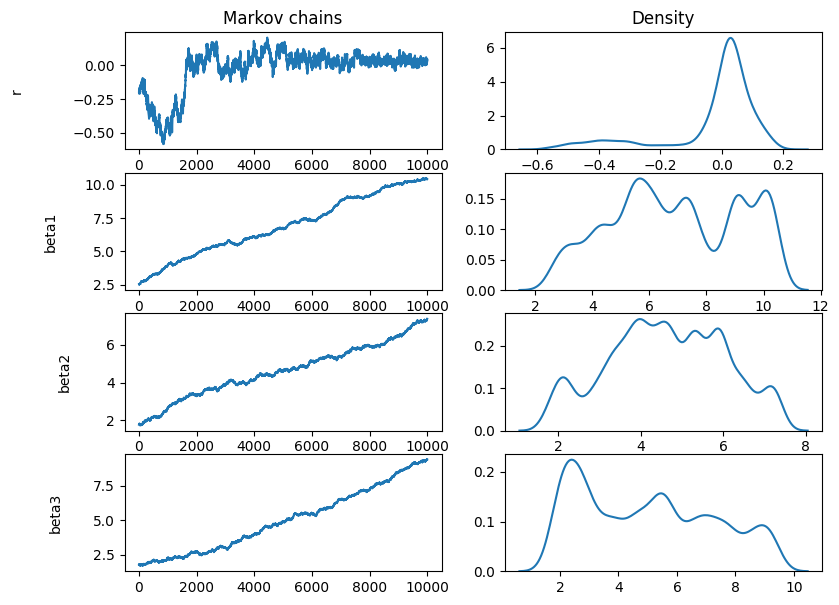

In [43]:
fig, axs = plt.subplots(4, 2, figsize = (9,7))
axs[0, 0].plot(chain[:,0][1000:])
axs[0, 0].set_ylabel('r', labelpad = 35)
axs[0, 0].set_title('Markov chains')
p = sns.kdeplot(ax=axs[0,1], data=chain[:,0][1000:])
p.set_ylabel("")
p.set_title("Density")
axs[1, 0].plot(chain[:,1][1000:])
axs[1, 0].set_ylabel('beta1', labelpad = 19)
sns.kdeplot(ax=axs[1,1], data=chain[:,1][1000:]).set_ylabel("")
axs[2, 0].plot(chain[:,2][1000:])
axs[2, 0].set_ylabel('beta2', labelpad = 25)
sns.kdeplot(ax=axs[2,1], data=chain[:,2][1000:]).set_ylabel("")
axs[3, 0].plot(chain[:,3][1000:])
axs[3, 0].set_ylabel('beta3', labelpad = 22)
sns.kdeplot(ax=axs[3,1], data=chain[:,3][1000:]).set_ylabel("");